In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Carregar o dataset Iris
iris = load_iris()
# Transformando em DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Transformando os dados numéricos em categorias
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas do datasert:")
print(iris_df.head())

Primeiras linhas do datasert:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [5]:
# Estatísticas Descritivas
print("\nEstatísticas Descritivas:")
print(iris_df.describe())


Estatísticas Descritivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [6]:
# Contagem de cada especie
print("\nContagem de cada espécie:")
print(iris_df['species'].value_counts()) # Group by pelo campos 'species'


Contagem de cada espécie:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


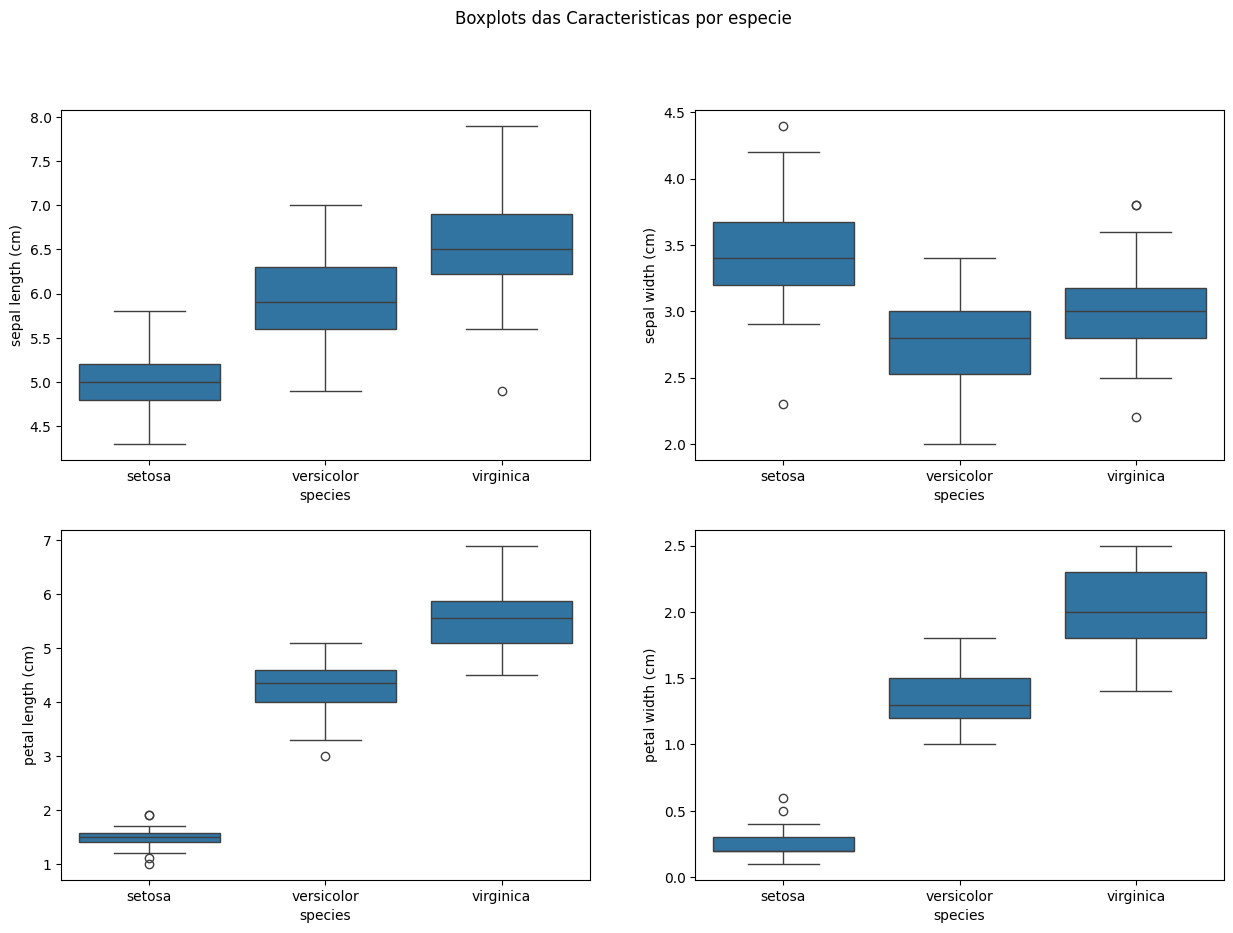

In [9]:
# Boxplots para cada característica por especie
# Grafico para apresentar a variacao de cada especie
plt.figure(figsize=(15, 10))

for i, feature in enumerate(iris.feature_names):
  plt.subplot(2, 2, i+1)
  sns.boxplot(x='species', y=feature, data=iris_df)

plt.suptitle('Boxplots das Caracteristicas por especie')
plt.show()


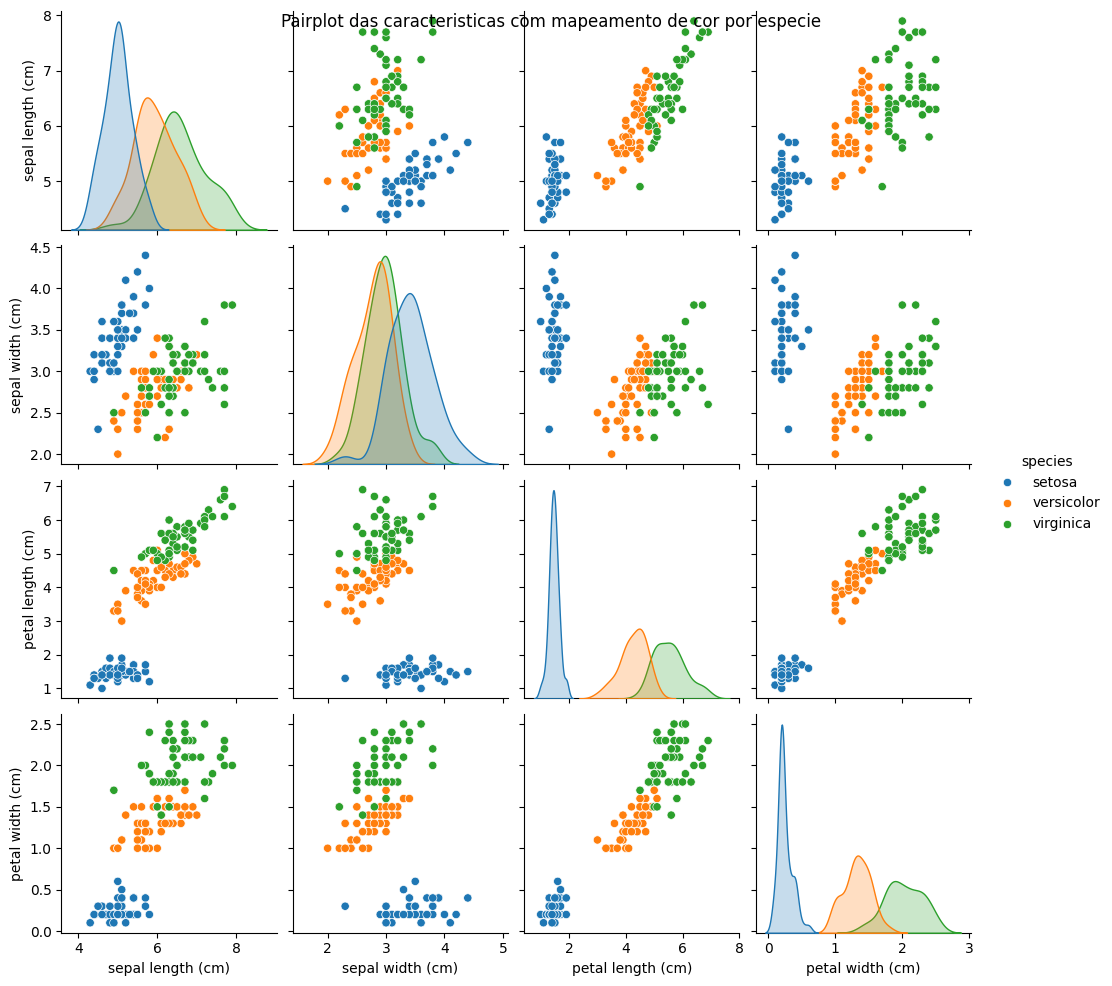

In [12]:
# Pairplot com mapeamento de cor por especie
# Grafico de dispersao
sns.pairplot(iris_df, hue='species')
plt.suptitle('Pairplot das caracteristicas com mapeamento de cor por especie')
plt.show()

In [19]:
## Algoritmos de ML
# Importacao dataset iris
from sklearn.datasets import load_iris
iris = load_iris()

In [22]:
# Pre-processamento: Divisao em treino e teste
from sklearn.model_selection import train_test_split
# Separa os conjuntos de teste (30%) e treinamento (70%)
# X: conjunto com as caracteristica ou colunas
# Y: conjunto com o target ou rotulo
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [31]:
# Exemplo de Arvore de Decisao
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

# Avaliacao do modelo
predictions = tree_model.predict(x_test)

# Matriz de confusao
# Na diagonal principal estao as decisoes corretas
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusao:\n", conf_matrix)

# Relatorio de classificacao
class_report = classification_report(y_test, predictions)
print("\nRelatorio de Classificacao:\n", class_report)

Matriz de Confusao:
 [[16  0  0]
 [ 0 11  1]
 [ 0  1 16]]

Relatorio de Classificacao:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



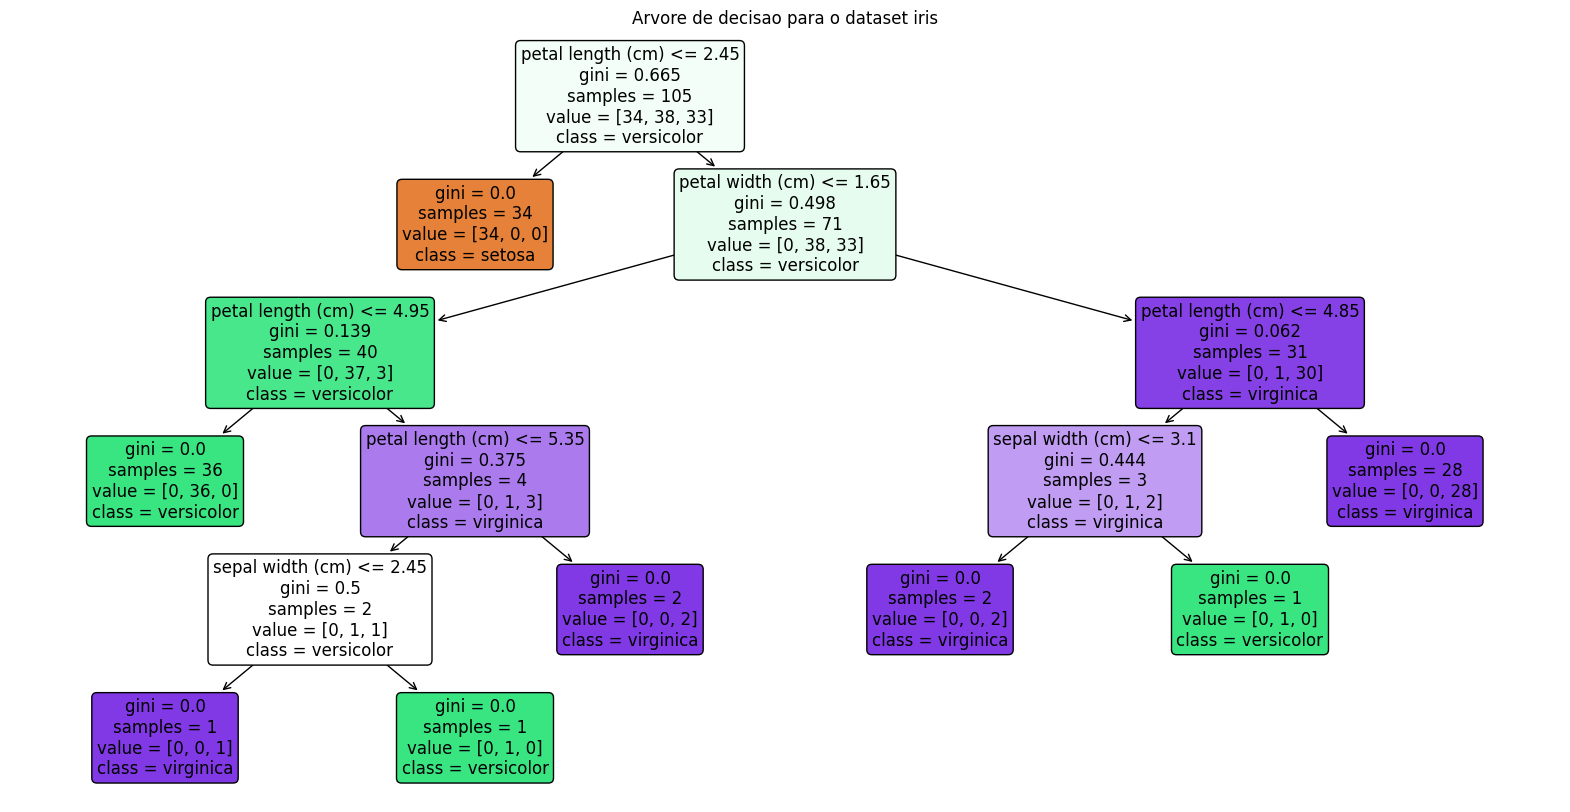

In [33]:
# Visualizacao da Arvore
plt.figure(figsize=(20, 10))
from sklearn import tree

tree.plot_tree(tree_model,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True,
               rounded=True,
               fontsize=12)
plt.title("Arvore de decisao para o dataset iris")
plt.show()

In [38]:
# Exemplo de Rede Neural
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Modelo de Rede Neural
# Nesse caso: 2 camadas escondidas, uma com 10 neuronios e outra com 5
# Treinar até a milesima iteracao
neural_model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)
neural_model.fit(x_train, y_train)

# Avaliacao do Modelo
predictions = neural_model.predict(x_test)

# Matriz de confusao
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusao:\n", conf_matrix)

# Relatorio de classificacao
class_report = classification_report(y_test, predictions)
print("\nRelatorio de Classificacao:\n", class_report)

Matriz de Confusao:
 [[18  0  0]
 [ 0 13  1]
 [ 0  0 13]]

Relatorio de Classificacao:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [54]:
# Exemplo KNN
from sklearn.neighbors import KNeighborsClassifier

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Avaliacao do Modelo
predictions = knn.predict(x_test)

# Matriz de confusao
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusao:\n", conf_matrix)

# Relatorio de classificacao
class_report = classification_report(y_test, predictions)
print("\nRelatorio de Classificacao:\n", class_report)

Matriz de Confusao:
 [[18  0  0]
 [ 0 13  1]
 [ 0  0 13]]

Relatorio de Classificacao:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

